In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('../data/database-27-10.json')

In [26]:
sender = df.groupby(['sender']).size().reset_index(name="amount").sort_values("amount", ascending=False)

In [27]:
sender.head(10)

,sender,amount
0,,3443
14,ARD-Hauptstadtstudio,161
278,tagesschau.de,99
172,SWR,67
105,ARD-Studio Washington,58
191,WDR,55
31,ARD-Studio Brüssel,49
43,ARD-Studio London,40
86,ARD-Studio Rom,34
35,ARD-Studio Istanbul,31


In [28]:
search = 'ARD-Hauptstadtstudio'

In [29]:
# Filter nach den Artikeln eines Autors
df = df.loc[(df['sender'] == 'ARD-Studio London')]

In [30]:
# Lösche time von datetime
df['date'] = df['date'].dt.normalize()

In [31]:
# Zähle die Artikel
df = df.groupby(['date', 'sender']).size().reset_index(name="amount").sort_values("amount")

In [32]:
# Bestimme den Startpunkt (Datum des ersten Artikel) bis zum Endpunkt (Datum des letzten Artikels)
min = df['date'].min()
max = df['date'].max()

In [33]:
mapping = dict(zip(df['date'], df['amount']))

In [34]:
df = pd.DataFrame({'date': pd.date_range(min, max, freq='D')})

In [35]:
df = df.assign(amount=df['date'].map(mapping))
df = df.fillna(0)

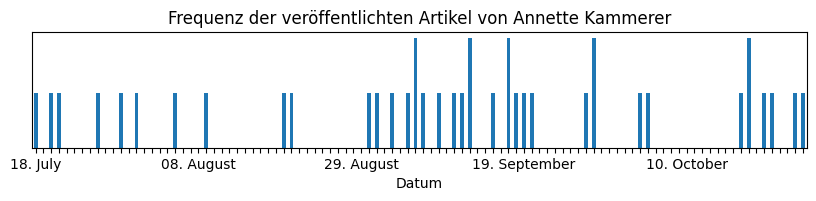

In [36]:

ax = df.plot(kind="bar", x="date", y="amount", figsize=(10,1.5), legend=False, rot=0)

ax.set_title("Frequenz der veröffentlichten Artikel von Annette Kammerer")

ax.set_xticklabels(df['date'].dt.strftime('%d. %B'))

ax.set_xlabel("Datum")

for i, t in enumerate(ax.get_xticklabels()):
    if (i % 21) != 0:
        t.set_visible(False)

y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)